In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast,json,glob,os


In [2]:
from matplotlib.offsetbox import bbox_artist


def load_df(fname):
    df = pd.read_csv(fname)
    
    df["SN Undiagnosed"] = df["SN Untreated chronic"].values + df["SN Untreated acute"].values
    df["CN Undiagnosed"] = df["CN Untreated chronic"].values + df["CN Untreated acute"].values
    
    df["SN sample size"] = [len(ast.literal_eval(x)) - len(ast.literal_eval(y)) for x,y in zip(df["SN sampled"],df["SN seed"])] #df.apply(lambda x: x["SN sampled"].len())
    df["CN sample size"] = [len(ast.literal_eval(x)) - len(ast.literal_eval(y)) for x,y in zip(df["CN sampled"],df["CN seed"])]
    
    return df
    
    
def plot_gn_tn(fname,savename,plotylim):
    df = load_df(fname)
    # Plot 1
    df.boxplot(column=["SN GN count","CN GN count","SN TN count","CN TN count"],positions=[1,2,3,4],patch_artist=True,medianprops=dict(color="k"),notch=True)
    # df.boxplot(column=["SN GN count","SN TN count"],positions=[1,3],patch_artist=True,medianprops=dict(color="k"),notch=True)
    # box2 = df.boxplot(column=["CN GN count","CN TN count"],return_type="dict",positions=[2,4],patch_artist=True,medianprops=dict(color="k"),notch=True)
    # for item in ['boxes', 'whiskers', 'fliers', 'caps']:
    #     plt.setp(box2[item], color="darkred")
    plt.ylim(plotylim)
    plt.ylabel("Number of pairs")
    try:
        plt.savefig(savename,bbox_inches="tight", dpi=600)
    except:
        plt.savefig(savename,bbox_inches="tight")
    plt.show()


def plot_comps(fname,savename):
    df = load_df(fname)
    # Plot 2
    df.boxplot(column=["SN sample size","SN HIV+","SN Out-of-care","SN Undiagnosed","CN sample size","CN HIV+","CN Out-of-care","CN Undiagnosed"],patch_artist=True,medianprops=dict(color="k"),notch=True)
    # df.boxplot(column=["SN HIV+"],positions=[1],patch_artist=True,medianprops=dict(color="k"),notch=True)
    # box2 = df.boxplot(column=["CN HIV+"],return_type="dict",positions=[2],patch_artist=True,medianprops=dict(color="k"),notch=True)
    # for item in ['boxes', 'whiskers', 'fliers', 'caps']:
    #     plt.setp(box2[item], color="darkred")
    plt.xticks(ticks=[1,2,3,4,5,6,7,8], labels=["SN size","SN HIV+","SN OOC","SN UD","CN size","CN HIV+","CN OOC","CN UD"])
    plt.ylim([0,625])
    try:
        plt.savefig(savename,bbox_inches="tight", dpi=600)
    except:
        plt.savefig(savename,bbox_inches="tight")
    plt.ylabel("Number of individuals")
    plt.show()


def boxplots(fname,savename1,savename2,plot1ylim=(0,40)):
    plot_gn_tn(fname,savename1,plot1ylim)
    plot_comps(fname,savename2)
    

def percentages(fname):
    df = load_df(fname)
    print("Number of rows with NaN: {}".format(df.shape[0] - df.dropna().shape[0]))
    df = df.dropna()
    SNdenom = np.median(df["SN sample size"].values)
    CNdenom = np.median(df["CN sample size"].values)
    SNhiv = np.median(df["SN HIV+"].values)
    CNhiv = np.median(df["CN HIV+"].values)
    SNooc = np.median(df["SN Out-of-care"].values)
    CNooc = np.median(df["CN Out-of-care"].values)
    SNud = np.median(df["SN Undiagnosed"].values)
    CNud = np.median(df["CN Undiagnosed"].values)
    props = {"SN sample size" : SNdenom, "CN sample size" : CNdenom, "SN HIV+" : SNhiv/SNdenom,"SN OOC" : SNooc/SNdenom,"SN UD" : SNud/SNdenom,"CN HIV+" : CNhiv/CNdenom,"CN OOC" : CNooc/CNdenom,"CN UD" : CNud/CNdenom}
    return props
    


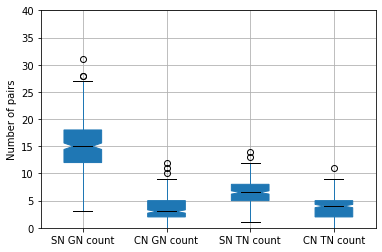

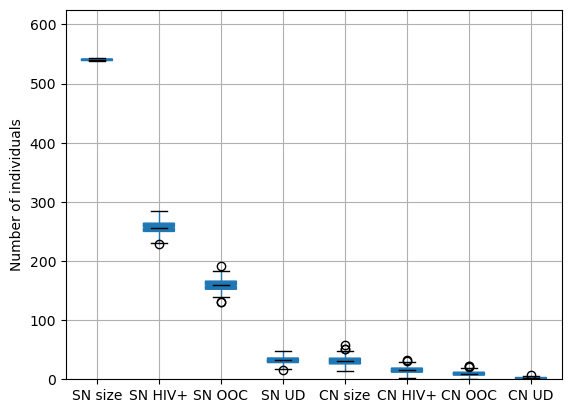

Number of rows with NaN: 0
{'SN sample size': 540.0, 'CN sample size': 31.0, 'SN HIV+': 0.475, 'SN OOC': 0.29444444444444445, 'SN UD': 0.05925925925925926, 'CN HIV+': 0.4838709677419355, 'CN OOC': 0.2903225806451613, 'CN UD': 0.06451612903225806}


In [3]:
fname = "results_trimmed_end/JOB758832/all_summaries_20221031.csv"
boxplots(fname,"results_trimmed_end/JOB758832/gn_tn_edges_20221031_end.jpg","results_trimmed_end/JOB758832/compartments_20221031_end.jpg")
props_100 = percentages(fname)
print(props_100)

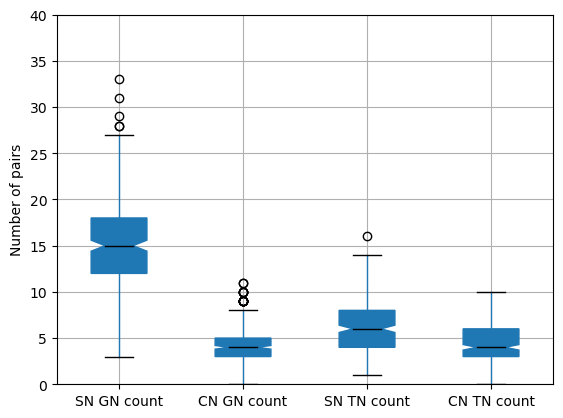

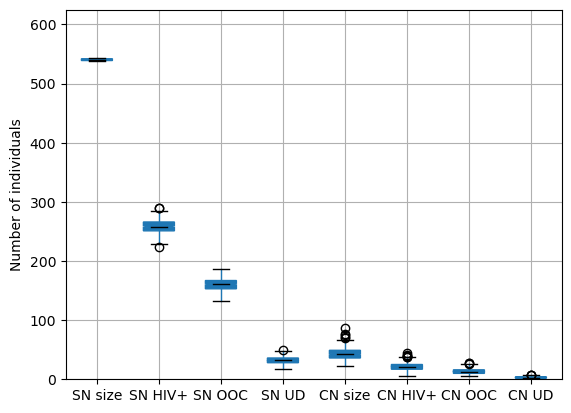

Number of rows with NaN: 0
{'SN sample size': 540.0, 'CN sample size': 42.0, 'SN HIV+': 0.4777777777777778, 'SN OOC': 0.29814814814814816, 'SN UD': 0.05925925925925926, 'CN HIV+': 0.5, 'CN OOC': 0.30952380952380953, 'CN UD': 0.07142857142857142}


In [4]:
fname = "results_trimmed_end/JOB758832_RDS_contact/all_summaries_20221031contact.csv"
boxplots(fname,"results_trimmed_end/JOB758832_RDS_contact/gn_tn_edges_20221031_end_contact.jpg","results_trimmed_end/JOB758832_RDS_contact/compartments_20221031_end_contact.jpg")
print(percentages(fname))

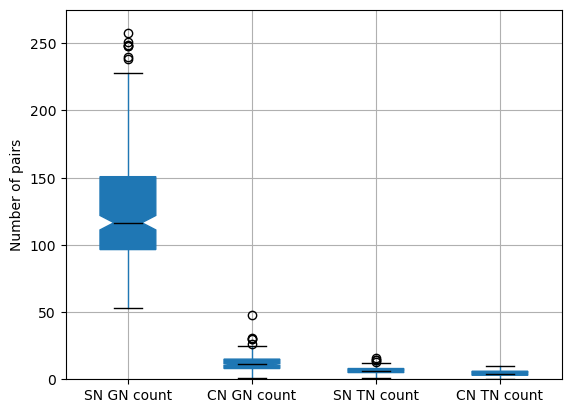

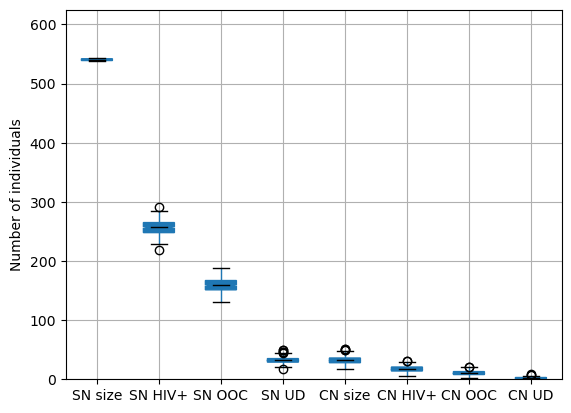

Number of rows with NaN: 0
{'SN sample size': 540.0, 'CN sample size': 32.0, 'SN HIV+': 0.4759259259259259, 'SN OOC': 0.29444444444444445, 'SN UD': 0.05925925925925926, 'CN HIV+': 0.53125, 'CN OOC': 0.3125, 'CN UD': 0.0625}


In [5]:
fname = "results_trimmed_infection/JOB784278/all_summaries_20221118_infection.csv"
boxplots(fname,"results_trimmed_infection/JOB784278/gn_tn_edges_20221118_infection.jpg","results_trimmed_infection/JOB784278/compartments_20221118_infection.jpg",plot1ylim=[0,275])
print(percentages(fname))

In [6]:
# fname = "results_trimmed_end/JOB758832_social_tracing/all_summaries_20221102_social.csv"
# boxplots(fname)
# print(percentages(fname))

sensitivity_analysis_acceptance/acceptance00/all_summaries_20221120160058.csv
sensitivity_analysis_acceptance/acceptance02/all_summaries_20221120160746.csv
sensitivity_analysis_acceptance/acceptance04/all_summaries_20221120161907.csv
sensitivity_analysis_acceptance/acceptance06/all_summaries_20221120163504.csv
sensitivity_analysis_acceptance/acceptance08/all_summaries_20221120164621.csv
sensitivity_analysis_acceptance/acceptance10/all_summaries_20221120165242.csv


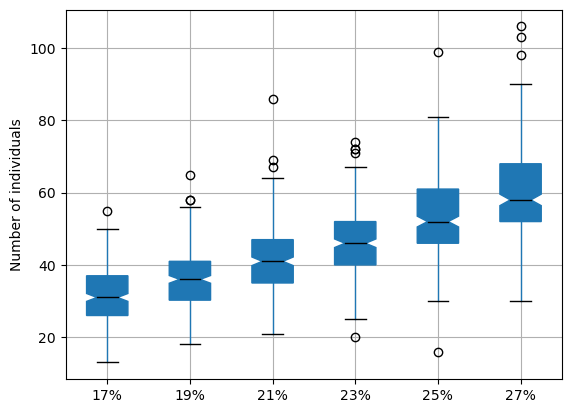

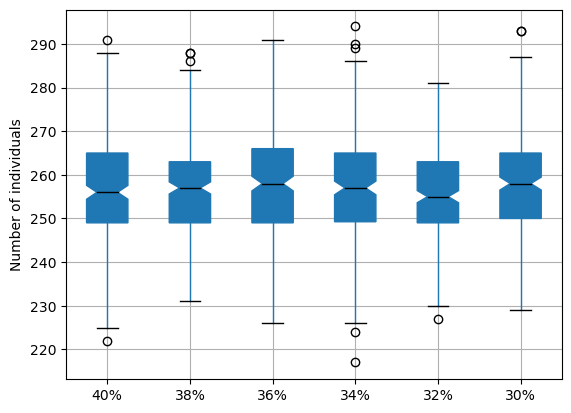

In [7]:
f = lambda d : glob.glob(os.path.join(os.path.join("sensitivity_analysis_acceptance",d),"all_summaries*"))[0]
fnames = [f("acceptance00"),f("acceptance02"),f("acceptance04"),f("acceptance06"),f("acceptance08"),f("acceptance10")]
cn_nums = ["17%","19%","21%","23%","25%","27%"]
cn_size = pd.DataFrame()
sn_nums = ["40%", "38%", "36%", "34%","32%","30%"]
sn_hiv = pd.DataFrame()
for n,m,fname in zip(cn_nums,sn_nums,fnames):
    print(fname)
    # plot_comps(fname,os.path.join(os.path.split(fname)[0],"compartments_20221120.jpg"))
    df = load_df(fname)
    cn_size[n] = df["CN sample size"].values
    sn_hiv[m] = df["SN HIV+"].values
cn_size.boxplot(column=cn_nums,patch_artist=True,medianprops=dict(color="k"),notch=True)
plt.ylabel("Number of individuals")
plt.savefig("sensitivity_analysis_acceptance/cn_size.jpg",bbox_inches="tight", dpi=600)
plt.show()
sn_hiv.boxplot(column=sn_nums,patch_artist=True,medianprops=dict(color="k"),notch=True)
plt.ylabel("Number of individuals")
plt.savefig("sensitivity_analysis_acceptance/sn_hiv_pos.jpg",bbox_inches="tight", dpi=600)
plt.show()


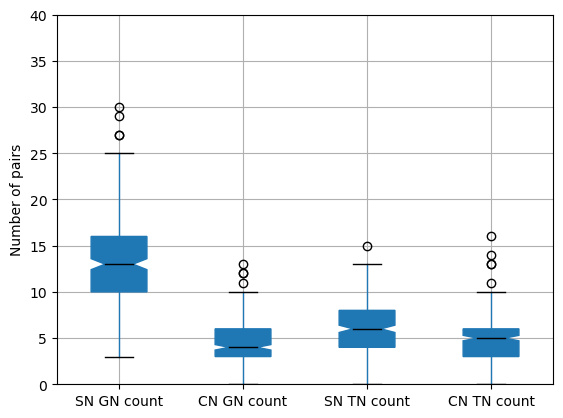

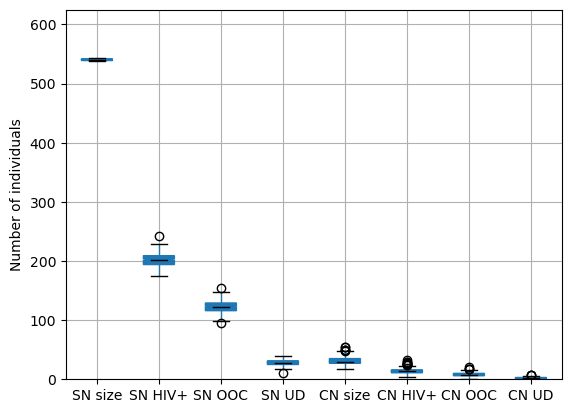

Number of rows with NaN: 2
{'SN sample size': 540.0, 'CN sample size': 30.0, 'SN HIV+': 0.37407407407407406, 'SN OOC': 0.22777777777777777, 'SN UD': 0.05185185185185185, 'CN HIV+': 0.4666666666666667, 'CN OOC': 0.26666666666666666, 'CN UD': 0.06666666666666667}


In [8]:
fname = "results_trimmed_75prevalence/JOB913797/all_summaries_75prevalence.csv"
boxplots(fname,"results_trimmed_75prevalence/JOB913797/gn_tn_edges_20221219_75prevalence.jpg","results_trimmed_75prevalence/JOB913797/compartments_20221219_75prevalence.jpg")
props_75 = percentages(fname)
print(props_75)

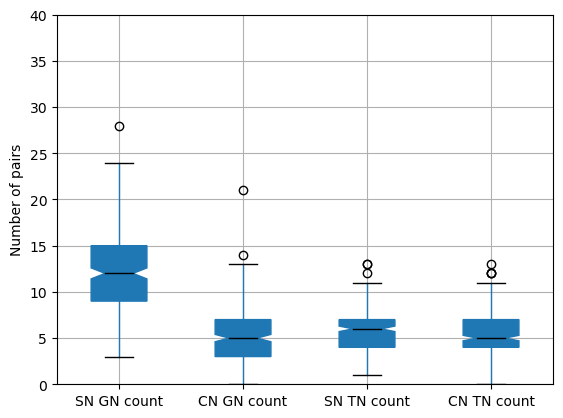

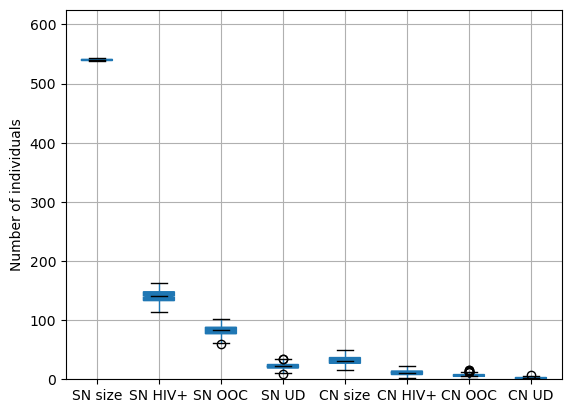

Number of rows with NaN: 0
{'SN sample size': 540.0, 'CN sample size': 31.0, 'SN HIV+': 0.25925925925925924, 'SN OOC': 0.1527777777777778, 'SN UD': 0.040740740740740744, 'CN HIV+': 0.3548387096774194, 'CN OOC': 0.1935483870967742, 'CN UD': 0.06451612903225806}


In [9]:
fname = "results_trimmed_50prevalence/JOB916185/all_summaries_50prevalence_20221220.csv"
boxplots(fname,"results_trimmed_50prevalence/JOB916185/gn_tn_edges_20221220_50prevalence.jpg","results_trimmed_50prevalence/JOB916185/compartments_20221220_50prevalence.jpg")
props_50 = percentages(fname)
print(props_50)


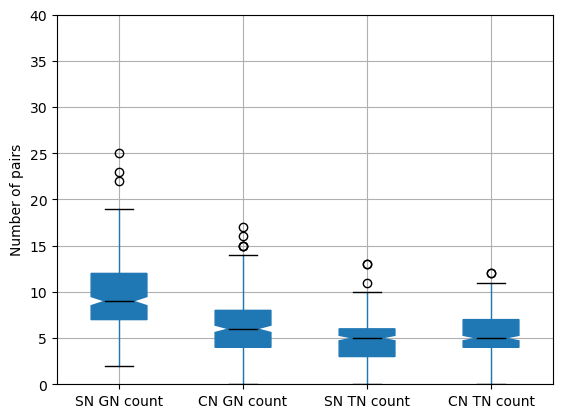

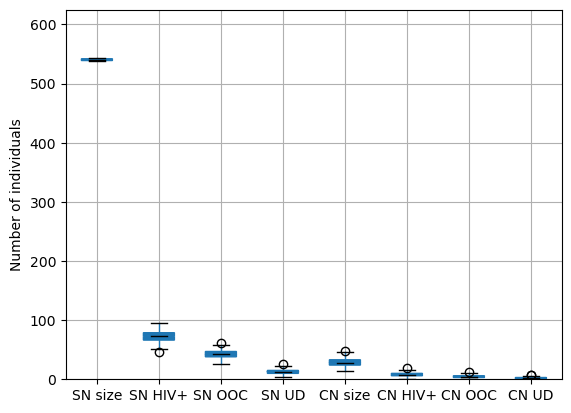

Number of rows with NaN: 1
{'SN sample size': 540.0, 'CN sample size': 28.0, 'SN HIV+': 0.13518518518518519, 'SN OOC': 0.07777777777777778, 'SN UD': 0.024074074074074074, 'CN HIV+': 0.2857142857142857, 'CN OOC': 0.14285714285714285, 'CN UD': 0.07142857142857142}


In [10]:
fname = "results_trimmed_25prevalence/JOB916621/all_summaries_25prevalence_20221221.csv"
boxplots(fname,"results_trimmed_25prevalence/JOB916621/gn_tn_edges_20221221_25prevalence.jpg","results_trimmed_25prevalence/JOB916621/compartments_20221221_25prevalence.jpg")
props_25 = percentages(fname)
print(props_25)

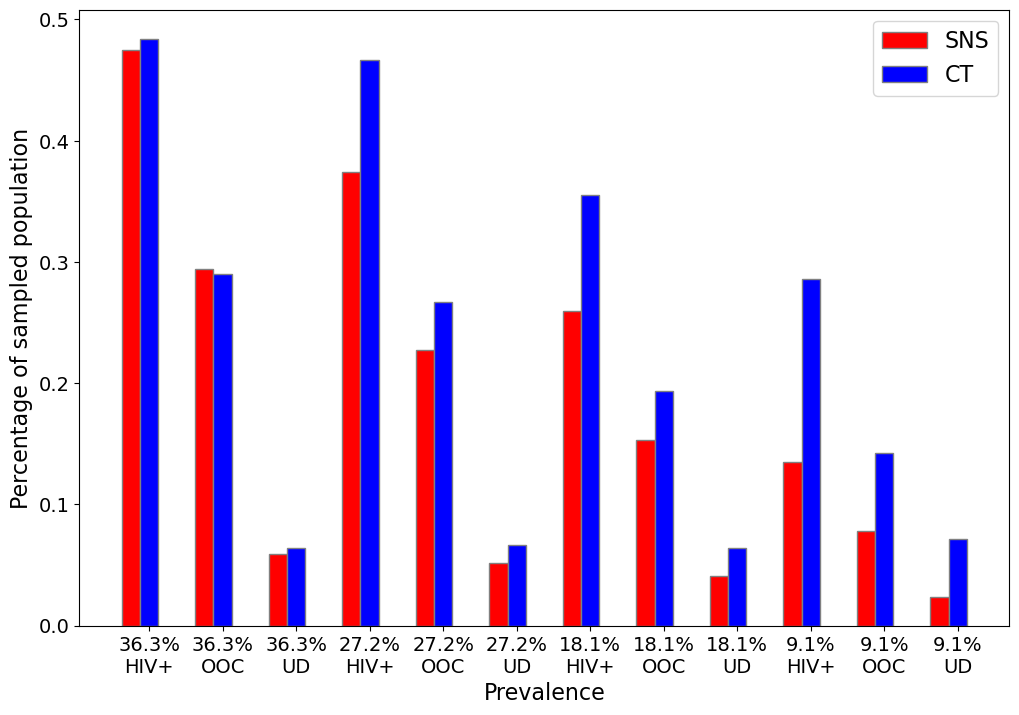

In [11]:
# make bar graph from props_100, props_75, props_50, and props_25

savename = "prevalence_plot_122122.jpg"

xticks = ["36.3%\nHIV+","36.3%\nOOC","36.3%\nUD","27.2%\nHIV+","27.2%\nOOC","27.2%\nUD","18.1%\nHIV+","18.1%\nOOC","18.1%\nUD","9.1%\nHIV+","9.1%\nOOC","9.1%\nUD"]

# set height of bar to match xticks
SNS = [props_100["SN HIV+"],props_100["SN OOC"],props_100["SN UD"],props_75["SN HIV+"],props_75["SN OOC"],props_75["SN UD"],props_50["SN HIV+"],props_50["SN OOC"],props_50["SN UD"],props_25["SN HIV+"],props_25["SN OOC"],props_25["SN UD"]]
CT = [props_100["CN HIV+"],props_100["CN OOC"],props_100["CN UD"],props_75["CN HIV+"],props_75["CN OOC"],props_75["CN UD"],props_50["CN HIV+"],props_50["CN OOC"],props_50["CN UD"],props_25["CN HIV+"],props_25["CN OOC"],props_25["CN UD"]]

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# Set position of bar on X axis
br1 = np.arange(len(SNS))
br2 = [x + barWidth for x in br1]

 
# Make the plot
plt.bar(br1, SNS, color ='r', width = barWidth,
        edgecolor ='grey', label ='SNS')
plt.bar(br2, CT, color ='b', width = barWidth,
        edgecolor ='grey', label ='CT')

 
# Adding Xticks
plt.xlabel('Prevalence', fontsize = 16)
plt.ylabel('Percentage of sampled population', fontsize = 16)
plt.xticks([r + barWidth for r in range(len(SNS))],
        xticks)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#make legend
plt.legend(fontsize=16)

# save figure
try:
        plt.savefig(savename,bbox_inches="tight", dpi=600)
except:
        plt.savefig(savename,bbox_inches="tight")

plt.show()


